In [1]:
from _lineage_benchmark_utils import do_op_lineage_benchmarks
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    
def benchmark_op_instrumentation_lineage():
    print("Instrumentation Results for Lineage")
    mean_benchmark_results = {}
    mean_benchmark_results["row_number"] = []
    mean_benchmark_results["repeats"] = []

    for row_number in row_numbers:
        mean_benchmark_results["row_number"].append(row_number)
        mean_benchmark_results["repeats"].append(repeats)
        benchmark_results = do_op_lineage_benchmarks(row_number, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    return pd.DataFrame(mean_benchmark_results)
    


In [3]:
#row_numbers = [1000, 10000]
#row_numbers = [1000, 10000, 100000]
row_numbers = [1000, 10000, 100000, 1000000]

#repeats = 2
#repeats = 10
#repeats = 15
repeats = 30


In [4]:
lineage_results = benchmark_op_instrumentation_lineage()
filepath = f"./figures/optimized-inspection-bencharks-lineage.csv"
lineage_results.to_csv(filepath, index=False)

Instrumentation Results for Lineage
Done: 1000
Done: 10000
Done: 100000
Done: 1000000


In [5]:
filepath = f"./figures/optimized-inspection-bencharks-lineage.csv"
lineage_df = pd.read_csv(filepath)
lineage_df

,row_number,repeats,dropna orig,dropna old,dropna new,join orig,join old,join new,one-hot orig,one-hot old,one-hot new
0,1000,30,0.001505,0.009885,0.005210,0.003450,0.023047,0.005483,0.000646,0.002450,0.000684
1,10000,30,0.002716,0.027220,0.005002,0.003714,0.096743,0.013417,0.002474,0.017844,0.002230
2,100000,30,0.015481,0.270910,0.036429,0.021773,0.757362,0.105496,0.017271,0.171562,0.016768
3,1000000,30,0.160036,2.459449,0.362548,0.394985,8.159227,1.459360,0.169002,1.667307,0.181699


In [6]:
def plot_overhead(orig, #old_histogram, new_histogram, 
                  old_lineage, new_lineage, run_row_numbers, title):
    
    markersize = 12

    #plt.plot(1.0 / epsilons, adult_means / np.min(adult_means), 'o-', markersize=markersize)

    plt.plot(run_row_numbers, np.array(orig) * 1000, linestyle='dotted', color='grey')
    #plt.plot(run_row_numbers, np.array(old_histogram) * 1000, linestyle='dashed', color='tab:blue')
    #plt.plot(run_row_numbers, np.array(new_histogram) * 1000, color='tab:blue')
    plt.plot(run_row_numbers, np.array(old_lineage) * 1000, linestyle='dashed', color='tab:orange')
    plt.plot(run_row_numbers, np.array(new_lineage) * 1000, color='tab:orange')

    #plt.ylim((0.9, 5.999))

    plt.ylabel('runtime (ms)', fontsize=26)
    plt.xlabel('# rows', fontsize=26)
    plt.legend(['no instrumentation', #'hist', 'hist (opt)', 
                'provenance', 'provenance (opt.)'], loc='upper left',
               #, title="inspections", title_fontsize=16,
               fontsize=20, ncol=1)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    plt.xticks(run_row_numbers[1:], rotation=45, fontsize=24)

    plt.yscale('log')
    plt.xscale('log')


    #plt.title(title, fontsize=26)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

In [7]:
filepath = f"./figures/optimized-inspection-bencharks-lineage.csv"
lineage_df = pd.read_csv(filepath)

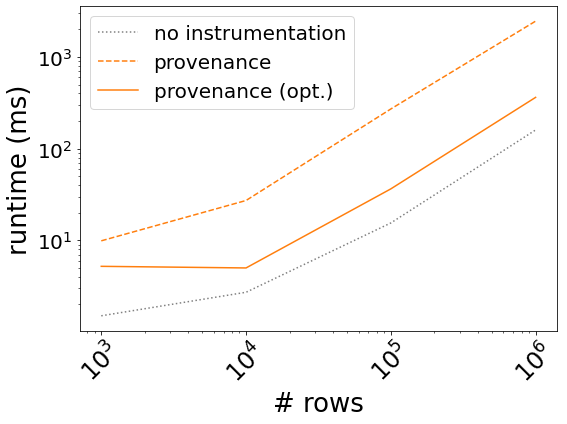

In [8]:
#dropna
plot_overhead(lineage_df["dropna orig"],
              lineage_df["dropna old"],
              lineage_df["dropna new"],
              lineage_df["row_number"],
              "dropna-hist-lineage")

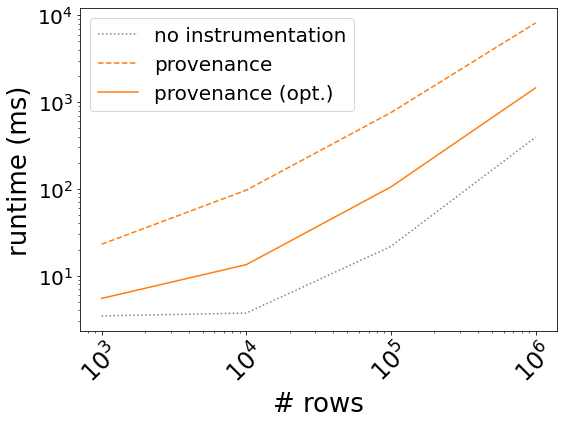

In [9]:
# join
plot_overhead(lineage_df["join orig"],
              #histogram_df["join old"],
              #histogram_df["join new"],
              lineage_df["join old"],
              lineage_df["join new"],
              lineage_df["row_number"],
              "join-hist-lineage")

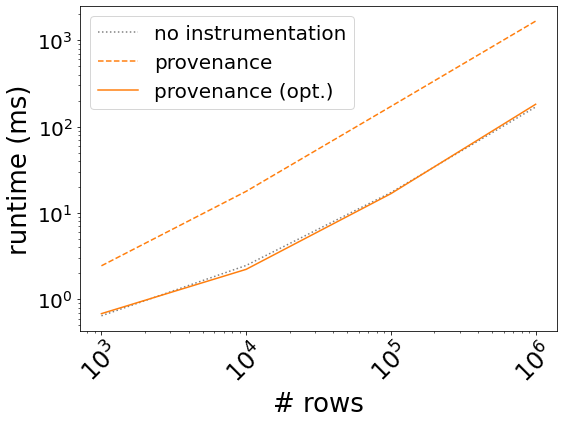

In [10]:
# one-hot
plot_overhead(lineage_df["one-hot orig"],
              #histogram_df["one-hot old"],
              #histogram_df["one-hot new"],
              lineage_df["one-hot old"],
              lineage_df["one-hot new"],
              lineage_df["row_number"],
              "one-hot-hist-lineage")